In [1]:
initial_path = 'peptide-QML'
# initial_path = '..'

In [2]:
import numpy as np
import sys, time
import matplotlib.pyplot as plt
sys.path.append(initial_path)

%load_ext autoreload
%autoreload 2
from my_code import helper_classes as c
from my_code import pytorch_model as ptm

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.4) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
# name of the notebook


In [4]:
sweep = c.Sweep.load(
    initial_path=initial_path,
    day='0912',
    file_name='sweep_12h_h_Am_Xqm-1',
)

In [5]:
sweep.params.keys()

dict_keys(['repetitions', 'n_layers_quantum_block', 'qubits_measurement'])

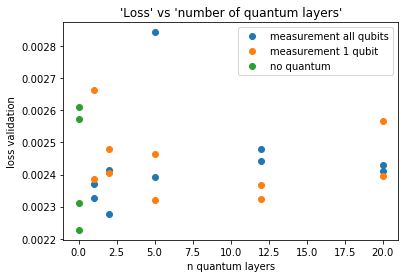

In [6]:
list_layers = {
    1: [],
    'all': [],
    'classical': [],
}
list_repetitions = {
    1: [],
    'all': [],
    'classical': [],
}
list_loss = {
    1: [],
    'all': [],
    'classical': [],
}
x_pred = {
    1: None,
    'all': None,
}
y_pred = {
    1: None,
    'all': None,
}

for mes in [1, 'all']:
    for x in sweep.points_w_data:
        if 'loss_validation' in x and mes == x['qubits_measurement']:
            if x['n_layers_quantum_block'] > 0:
                list_layers[mes].append(x['n_layers_quantum_block'])
                list_repetitions[mes].append(x['repetitions'])
                list_loss[mes].append(x['loss_validation'])
            else:
                list_layers['classical'].append(x['n_layers_quantum_block'])
                list_repetitions['classical'].append(x['repetitions'])
                list_loss['classical'].append(x['loss_validation'])

    # regression of second degree
    degree = 2
    x, y = np.array(list_layers[mes]), np.array(list_loss[mes])
    coefficients = np.polyfit(x, y, degree)
    x_pred[mes] = np.linspace(x.min(), x.max(), 100)
    y_pred[mes] = np.polyval(coefficients, x_pred[mes])

# plot
plt.plot(list_layers['all'], list_loss['all'], 'o', label='measurement all qubits')
plt.plot(list_layers[1], list_loss[1], 'o', label='measurement 1 qubit')
plt.plot(list_layers['classical'], list_loss['classical'], 'o', label='no quantum')
# plt.plot(x_pred['all'], y_pred['all'], label='regression of degree {}'.format(degree))
# plt.plot(x_pred[1], y_pred[1], label='regression of degree {}'.format(degree))
plt.xlabel('n quantum layers')
plt.ylabel('loss validation')
plt.legend()
# plt.xscale('log')
plt.title("'Loss' vs 'number of quantum layers'")
plt.show()


In [7]:
sweep = c.Sweep.load(
    initial_path=initial_path,
    day='0912',
    file_name='sweep_12h_h_Xqm-2',
)

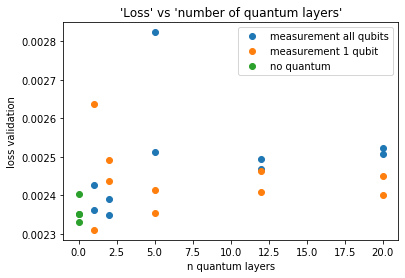

In [8]:
list_layers = {
    1: [],
    'all': [],
    'classical': [],
}
list_repetitions = {
    1: [],
    'all': [],
    'classical': [],
}
list_loss = {
    1: [],
    'all': [],
    'classical': [],
}
x_pred = {
    1: None,
    'all': None,
}
y_pred = {
    1: None,
    'all': None,
}

for mes in [1, 'all']:
    for x in sweep.points_w_data:
        if 'loss_validation' in x and mes == x['qubits_measurement']:
            if x['n_layers_quantum_block'] > 0:
                list_layers[mes].append(x['n_layers_quantum_block'])
                list_repetitions[mes].append(x['repetitions'])
                list_loss[mes].append(x['loss_validation'])
            else:
                list_layers['classical'].append(x['n_layers_quantum_block'])
                list_repetitions['classical'].append(x['repetitions'])
                list_loss['classical'].append(x['loss_validation'])

    # regression of second degree
    degree = 2
    x, y = np.array(list_layers[mes]), np.array(list_loss[mes])
    coefficients = np.polyfit(x, y, degree)
    x_pred[mes] = np.linspace(x.min(), x.max(), 100)
    y_pred[mes] = np.polyval(coefficients, x_pred[mes])

# plot
plt.plot(list_layers['all'], list_loss['all'], 'o', label='measurement all qubits')
plt.plot(list_layers[1], list_loss[1], 'o', label='measurement 1 qubit')
plt.plot(list_layers['classical'], list_loss['classical'], 'o', label='no quantum')
# plt.plot(x_pred['all'], y_pred['all'], label='regression of degree {}'.format(degree))
# plt.plot(x_pred[1], y_pred[1], label='regression of degree {}'.format(degree))
plt.xlabel('n quantum layers')
plt.ylabel('loss validation')
plt.legend()
# plt.xscale('log')
plt.title("'Loss' vs 'number of quantum layers'")
plt.show()

In [14]:
len(list_layers[1]), len(list_layers['all']), len(list_layers['classical'])

(10, 10, 4)